In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import daft
from matplotlib import rc
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
import pdb

# Question 1

Get and plot the data 

In [2]:
data = pd.read_csv('ps5_data.csv')
x_1 = data.x_1.tolist()
x_2 = data.x_2.tolist()
c = data.classification.tolist()

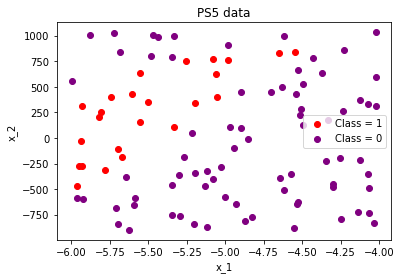

In [3]:
for i in range(len(x_1)):
    if c[i] == 0: 
        plt.scatter(x_1[i], x_2[i], c = 'purple')
    elif c[i] == 1:
        plt.scatter(x_1[i], x_2[i], c = 'red')
    else:
        print('WARNING')

    legend_elements = [
plt.scatter([], [], marker='o', color='red', label='Class = 1'),
plt.scatter([], [], marker='o', color='purple', label='Class = 0')
]
    
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('PS5 data')
plt.legend(handles=legend_elements)
plt.show()


Now we are tasked with building the nural network that will predict the classification given some $x_1$, $x_2$ input. The netwrok will have one hidden layer wtih seven neurons in it. The choice for activation function will be the sigmoid function:

$$
f(x) = S(x) = \frac{1}{1 + e^{-x}}
$$
Now lets draw the network 

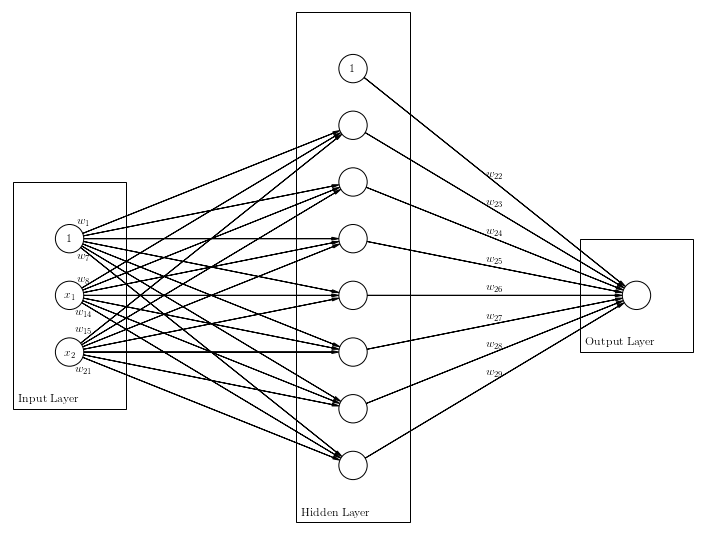

In [4]:
rc("font", family="serif", size=12)
rc("text", usetex=True)
pgm = daft.PGM()

#adding nodes 
pgm.add_node('b1', r"$1$", 0, 1)
pgm.add_node('x1', r"$x_1$", 0, 0)
pgm.add_node('x2', r"$x_2$", 0, -1)


pgm.add_node('b2', r"1", 5, 4)
pgm.add_node('n1', r"", 5, 3)
pgm.add_node('n2', r"", 5, 2)
pgm.add_node('n3', r"", 5, 1)
pgm.add_node('n4', r"", 5, 0)
pgm.add_node('n5', r"", 5, -1)
pgm.add_node('n6', r"", 5, -2)
pgm.add_node('n7', r"", 5, -3)

pgm.add_node('o1', r"", 10, 0)

#and now the edges
pgm.add_edge("b1", "n1", xoffset=-4.5,yoffset=-1.5, label=r'$w_1$')
pgm.add_edge("b1", "n2")
pgm.add_edge("b1", "n3")
pgm.add_edge("b1", "n4")
pgm.add_edge("b1", "n5")
pgm.add_edge("b1", "n6")
pgm.add_edge("b1", "n7", xoffset=-4.5,yoffset=+3.3,label=r'$w_7$')

pgm.add_edge("x1", "n1", xoffset=-4.5, yoffset= -2.5 , label=r'$w_8$')
pgm.add_edge("x1", "n2")
pgm.add_edge("x1", "n3")
pgm.add_edge("x1", "n4")
pgm.add_edge("x1", "n5")
pgm.add_edge("x1", "n6")
pgm.add_edge("x1", "n7", xoffset=-4.5, yoffset=2.3, label=r'$w_{14}$')

pgm.add_edge("x2", "n1", xoffset=-4.5, yoffset= -3.3, label=r'$w_{15}$')
pgm.add_edge("x2", "n2")
pgm.add_edge("x2", "n3")
pgm.add_edge("x2", "n4")
pgm.add_edge("x2", "n5")
pgm.add_edge("x2", "n6")
pgm.add_edge("x2", "n7",  xoffset=-4.5, yoffset= 1.3,label=r'$w_{21}$')

pgm.add_edge("b2", "o1", yoffset= 0.2, label=r'$w_{22}$')
pgm.add_edge("n1", "o1", yoffset= 0.2, label=r'$w_{23}$')
pgm.add_edge("n2", "o1", yoffset= 0.2,label=r'$w_{24}$')
pgm.add_edge("n3", "o1", yoffset= 0.2,label=r'$w_{25}$')
pgm.add_edge("n4", "o1", yoffset= 0.2,label=r'$w_{26}$')
pgm.add_edge("n5", "o1", yoffset= 0.2,label=r'$w_{27}$')
pgm.add_edge("n6", "o1", yoffset= 0.2,label=r'$w_{28}$')
pgm.add_edge("n7", "o1", yoffset= 0.2,label=r'$w_{29}$')

pgm.add_plate([-1, -2, 2, 4], label="Input Layer")
pgm.add_plate([4, -4, 2, 9], label="Hidden Layer")
pgm.add_plate([9, -1, 2, 2], label="Output Layer")

pgm.render();

Derive the updated estimates for the weights by finding
the derivatives of the loss function with respect to the weights.

The updated estimates for the weights are calculated by finding the derivatives of the loss function w.r.t each weight which, for which we have 29 of

The loss function is given by: 

$$
E = \frac{1}{2}\sum_{i}^{N}(y_i - y_{\textrm{pred},i})^2
$$ 
 
Where: 

$$
y_{\textrm{pred},i} = f(\alpha)
$$
 
$f(x)$ is the previously defined sigmoid function and $\alpha$ is input to the activation function and is the weighted sum of the previous layer. For the case of $H_1$ it would be: 

$$
\alpha_{H1} = w_1 + w_8x_1 + w_15x_2 \\
\beta_{H1} = f(\alpha_{H1})
$$

and for the final output: 

$$
\alpha_{O1} = w_{22} +  w_{23}\beta_{H1} +  w_{24}\beta_{H2} +  w_{25}\beta_{H3} +  w_{26}\beta_{H4} +  w_{27}\beta_{H5} +  w_{28}\beta_{H6} +  w_{29}\beta_{H7} \\
\beta_{O1} = f(\alpha_{O1})
$$

To get the derivatives we simply envoke the chain rule such that the : 

$$
\frac{\partial{}E}{\partial{}w_{22}} = \frac{\partial{}E}{\partial{}\beta_{O1}} 
                                      \frac{\partial{}\beta_{O1}}{\partial{}\alpha_{O1}}
                                      \frac{\partial{}\alpha_{O1}}{\partial{}w_{22}}
$$

Where,

$$
\frac{\partial{}\alpha_{O1}}{\partial{}w_{22}} = 1 
$$

$$
\frac{\partial{}\beta_{O1}}{\partial{}\alpha_{O1}} = \frac{\partial{}}{\partial{}\alpha_{O1}} \frac{1}{1 + e^{-\alpha_{O1}}} = \beta_{O1}\left(1 - \beta_{O1}\right)
$$

$$
\frac{\partial{}E}{\partial{}\beta_{O1}}  = \frac{\partial{}}{\partial{}\beta_{O1}}\frac{1}{2}\sum_{i}^{N}(y_i - \beta_{O1})^2 =  -\left(y - \beta_{O1}\right)
$$

So that 

$$
\frac{\partial{}E}{\partial{}w_{22}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)
$$

We can then update our weights with each itteration via:

$$
w_{22}^{(t+1)} = w_{22}^{(t)} - \eta\frac{\partial{}E}{\partial{}w_{22}} \quad.
$$

Where we introduce the hyperparameter $\eta$ which is defined as the learning rate of our network. \\

Simmilarly the updates weights for $w_1$ will be calculated via: 

$$
\frac{\partial{}E}{\partial{}w_{1}} = \frac{\partial{}E}{\partial{}\beta_{O1}}
                                            \frac{\partial{}\beta_{O1}}{\partial{}\alpha_{O1}} 
                                            \frac{\partial{}\alpha_{O1}}{\partial{}\beta_{H1}}
                                            \frac{\partial{}\beta_{H1}}{\partial{}\alpha_{H1}}
                                            \frac{\partial{}\alpha_{H1}}{\partial{}w_{1}}
$$
Where we need 
$$
\frac{\partial{}\alpha_{O1}}{\partial{}\beta_{H1}} = w_{23}
$$
$$
\frac{\partial{}\beta_{H1}}{\partial{}\alpha_{H1}} = \beta_{H1}\left(1 - \beta_{H1}\right)
$$
and 
$$
\frac{\partial{}\alpha_{H1}}{\partial{}w_{1}} = 1
$$

Such that: 



$$
\frac{\partial{}E}{\partial{}w_{1}} = \frac{\partial{}E}{\partial{}\beta_{O1}}
                                            \frac{\partial{}\beta_{O1}}{\partial{}\alpha_{O1}} 
                                            \frac{\partial{}\alpha_{O1}}{\partial{}\beta_{H1}}
                                            \frac{\partial{}\beta_{H1}}{\partial{}\alpha_{H1}}
                                            \frac{\partial{}\alpha_{H1}}{\partial{}w_{1}}
$$

$$
\frac{\partial{}E}{\partial{}w_{1}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{23}\beta_{H1}\left(1 - \beta_{H1}\right)
$$

Continueing with the above framework we get the following derivatives: \
$$
\frac{\partial{}E}{\partial{}{w_1}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{23}\beta_{H1}\left(1 - \beta_{H1}\right)\\
\frac{\partial{}E}{\partial{}{w_2}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{24}\beta_{H2}\left(1 - \beta_{H2}\right)\\
\frac{\partial{}E}{\partial{}{w_3}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{25}\beta_{H3}\left(1 - \beta_{H3}\right)\\
\frac{\partial{}E}{\partial{}{w_4}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{26}\beta_{H4}\left(1 - \beta_{H4}\right)\\
\frac{\partial{}E}{\partial{}{w_5}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{27}\beta_{H5}\left(1 - \beta_{H5}\right)\\
\frac{\partial{}E}{\partial{}{w_6}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{28}\beta_{H6}\left(1 - \beta_{H6}\right)\\
\frac{\partial{}E}{\partial{}{w_7}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{29}\beta_{H7}\left(1 - \beta_{H7}\right)\\
\frac{\partial{}E}{\partial{}{w_8}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{23}\beta_{H1}\left(1 - \beta_{H1}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_9}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{24}\beta_{H2}\left(1 - \beta_{H2}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{10}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{25}\beta_{H3}\left(1 - \beta_{H3}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{11}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{26}\beta_{H4}\left(1 - \beta_{H4}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{12}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{27}\beta_{H5}\left(1 - \beta_{H5}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{13}}}= \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{28}\beta_{H6}\left(1 - \beta_{H6}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{14}}}= \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{29}\beta_{H7}\left(1 - \beta_{H7}\right)x_1\\
\frac{\partial{}E}{\partial{}{w_{15}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{23}\beta_{H1}\left(1 - \beta_{H1}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{16}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{24}\beta_{H2}\left(1 - \beta_{H2}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{17}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{25}\beta_{H3}\left(1 - \beta_{H3}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{18}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{26}\beta_{H4}\left(1 - \beta_{H4}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{19}}} = \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{27}\beta_{H5}\left(1 - \beta_{H5}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{20}}}= \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{28}\beta_{H6}\left(1 - \beta_{H6}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{21}}}= \left(\beta_{O1} - y\right)\beta_{O1}\left(1 - \beta_{O1}\right)w_{29}\beta_{H7}\left(1 - \beta_{H7}\right)x_2\\
\frac{\partial{}E}{\partial{}{w_{22}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\\
\frac{\partial{}E}{\partial{}{w_{23}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H1}\\
\frac{\partial{}E}{\partial{}{w_{24}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H2}\\
\frac{\partial{}E}{\partial{}{w_{25}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H3}\\
\frac{\partial{}E}{\partial{}{w_{26}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H4}\\
\frac{\partial{}E}{\partial{}{w_{27}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H5}\\
\frac{\partial{}E}{\partial{}{w_{28}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H6}\\
\frac{\partial{}E}{\partial{}{w_{29}}} = \beta_{O1}(1 - \beta_{O1})(\beta_{O1} - y)\beta_{H7}\\
$$

# Question 2 

Before we implement our neural network we should segment the data into a training and testing set. We would typically use a 1/4 split such that we can train the network with as much data avaliable while still leaving a significant proportion to test with. 


In [5]:
# seperate the data into inputs and expected outputs 
X = np.stack((x_1, x_2)).T
Y = np.array(c).reshape((-1, 1))


# we need to normalise the data to avoid saturation or dead neurons
X_mean, X_std = (np.mean(X, axis=0), np.std(X, axis=0))
Y_mean, Y_std = (np.mean(Y), np.std(Y))
y = (Y - Y_mean) / Y_std
x = (X - X_mean) / X_std

# This function will randomly split our data set into a training and test set. 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)


# get sizes
N, D_in = x_train.shape
N, D_out = y_train.shape
N_test, _ = x_test.shape


#define the activation function 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Now that we have prepared our data we need to initialise the weights which will be drawn from: 

$$
w \sim \mathcal{N}\left(0, 1\right) \quad .
$$
This is strictly because we normalised our input data to be centered around 0 and have unit variance.


In [6]:
np.random.seed(0)
H = 7 # The number of neurons in the hidden layer.

# Weights for the bias terms to the hidden neurons
w1, w2, w3, w4, w5, w6, w7 = np.random.randn(H) 

# Weights for x1 to each hidden neuron.
w8, w9, w10, w11, w12, w13, w14 = np.random.randn(H)

# Weights for x2 to each hidden neurons.
w15, w16, w17, w18, w19, w20, w21 = np.random.randn(H)

# Weights for each hidden neuron + bias to the output.
w22, w23, w24, w25, w26, w27, w28, w29 = np.random.randn(H+1)

w = np.array([w1, w2, w3, w4, w5, w6, w7,
            w8, w9, w10, w11, w12, w13, w14,
            w15, w16, w17, w18, w19, w20, w21,
            w22, w23, w24, w25, w26, w27, w28, w29
             ])

In [7]:
def forward_pass(x,w,N): 
    
    w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, \
    w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, \
    w25, w26, w27, w28, w29 = w
    
    # Hidden layer.
    hidden_layer_inputs = np.hstack([
        np.ones((N, 1)),
        x
    ])
    hidden_layer_weights = np.array([
        [ w1,  w2,  w3,  w4,  w5, w6, w7],
        [ w8,  w9,  w10,  w11, w12, w13, w14],
        [w15, w16, w17, w18, w19, w20, w21]
    ])

    alpha_h = hidden_layer_inputs @ hidden_layer_weights
    beta_h = sigmoid(alpha_h)

    # Output layer.
    output_layer_inputs = np.hstack([
        np.ones((N, 1)),
        beta_h
    ])
    output_layer_weights = np.array([
        [w22, w23, w24, w25, w26, w27, w28, w29]
    ]).T


    alpha_o = output_layer_inputs @ output_layer_weights
    beta_o = sigmoid(alpha_o)

    y_pred = beta_o
    return beta_h, y_pred

In [8]:
def backward_propagation(x, y, y_pred, w, beta_h, eta): # or back_prop for the cooler kids
    
    w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, \
    w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, \
    w25, w26, w27, w28, w29 = w.flatten()
    
        # Calculate gradients.
    s = (y_pred - y) * y_pred * (1 - y_pred)
    
    dE_dw29 = s * beta_h[:, [6]]
    dE_dw28 = s * beta_h[:, [5]]
    dE_dw27 = s * beta_h[:, [4]]
    dE_dw26 = s * beta_h[:, [3]]
    dE_dw25 = s * beta_h[:, [2]]
    dE_dw24 = s * beta_h[:, [1]]
    dE_dw23 = s * beta_h[:, [0]]
    dE_dw22 = s
    
    dE_dw21 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [1]]
    dE_dw20  = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [1]]
    dE_dw19 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [1]]
    dE_dw18  = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [1]]
    dE_dw17  = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [1]]
    dE_dw16  = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [1]]
    dE_dw15  = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [1]]
    
    dE_dw14 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [0]]
    dE_dw13  = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [0]]
    dE_dw12 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [0]]
    dE_dw11  = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [0]]
    dE_dw10  = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [0]]
    dE_dw9  = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [0]]
    dE_dw8  = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [0]]
    
    dE_dw7  = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]])
    dE_dw6  = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]])
    dE_dw5  = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]])
    dE_dw4  = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]])
    dE_dw3  = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]])
    dE_dw2  = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]])
    dE_dw1  = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]])
    
    
    # Now update the weights using stochastic gradient descent.
    w1 = w1 - eta * np.sum(dE_dw1)
    w2 = w2 - eta * np.sum(dE_dw2)
    w3 = w3 - eta * np.sum(dE_dw3)
    w4 = w4 - eta * np.sum(dE_dw4)
    w5 = w5 - eta * np.sum(dE_dw5)
    w6 = w6 - eta * np.sum(dE_dw6)
    w7 = w7 - eta * np.sum(dE_dw7)
    w8 = w8 - eta * np.sum(dE_dw8)
    w9 = w9 - eta * np.sum(dE_dw9)
    w10 = w10 - eta * np.sum(dE_dw10)
    w11 = w11 - eta * np.sum(dE_dw11)
    w12 = w12 - eta * np.sum(dE_dw12)
    w13 = w13 - eta * np.sum(dE_dw13)
    w14 = w14 - eta * np.sum(dE_dw14)
    w15 = w15 - eta * np.sum(dE_dw15)
    w16 = w16 - eta * np.sum(dE_dw16)
    w17 = w17 - eta * np.sum(dE_dw17)
    w18 = w18 - eta * np.sum(dE_dw18)
    w19 = w19 - eta * np.sum(dE_dw19)
    w20 = w20 - eta * np.sum(dE_dw20)
    w21 = w21 - eta * np.sum(dE_dw21)
    w22 = w22 - eta * np.sum(dE_dw22)
    w23 = w23 - eta * np.sum(dE_dw23)
    w24 = w24 - eta * np.sum(dE_dw24)
    w25 = w25 - eta * np.sum(dE_dw25)
    w26 = w26 - eta * np.sum(dE_dw26)
    w27 = w27 - eta * np.sum(dE_dw27)
    w28 = w28 - eta * np.sum(dE_dw28)
    w29 = w29 - eta * np.sum(dE_dw29)
    
    w_new = np.array([w1, w2, w3, w4, w5, w6, w7, w8, w9, w10,
          w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, 
          w21, w22, w23, w24, w25, w26, w27, w28, w29     
        ])
    return w_new


Since our network involves more neurons and the data is larger than that of the example in the lectures. It follows that it would take longer to train the network, however it would still strongly depend on the initialisation. For these reason I train the network with $10^5$ epochs. From my understanding its better to have a lower learning rate as it reduces the cahnces of errors the only downside is that it will take longer to train the network and potentially the adjusted weights might not be able to overstep a local minima. For these reasons I used a learning rate of $10^{-4}$ which seems to give a good result. After all these hyperparameters can be tweak to give better results.  

In [9]:
num_epochs = 100000
train_losses = np.empty(num_epochs)
test_losses = np.empty(num_epochs)

eta = 1e-4
for epoch in range(num_epochs):
    # forward pass
    beta_h, y_pred_train = forward_pass(x_train, w, N)
    _, y_pred_test = forward_pass(x_test, w, N_test)

    # loss
    train_loss = 0.5 * np.sum((y_pred_train - y_train)**2)
    test_loss = 0.5 * np.sum((y_pred_test - y_test)**2)
    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss


    # print progress 
    if not epoch % 1000:
        print(epoch, train_loss)


    # back prop
    w = backward_propagation(x_train, y_train, y_pred_train, w, beta_h, eta)

0 71.57934181999214
1000 38.13422940127698
2000 36.74357040699801
3000 35.93488026384721
4000 35.14382469683132
5000 34.42184759427715
6000 33.80863164448289
7000 33.29792506609776
8000 32.869024097142706
9000 32.50185308850422
10000 32.180608308488615
11000 31.893671889453834
12000 31.63267249265887
13000 31.39157075785809
14000 31.165963570874148
15000 30.9525973970789
16000 30.74903784812785
17000 30.553446216775647
18000 30.36442669945761
19000 30.180919826250225
20000 30.002126186221
21000 29.827450240373814
22000 29.656457669504526
23000 29.488842018270727
24000 29.324397870275256
25000 29.1629987443983
26000 29.004578536489134
27000 28.849115758260197
28000 28.69662011323852
29000 28.54712113662469
30000 28.40065873629569
31000 28.257275524090062
32000 28.11701083593291
33000 27.97989632161356
34000 27.84595295444273
35000 27.715189279758306
36000 27.587600698176296
37000 27.463169569529015
38000 27.341865927772602
39000 27.223648614018998
40000 27.10846666071926
41000 26.996260

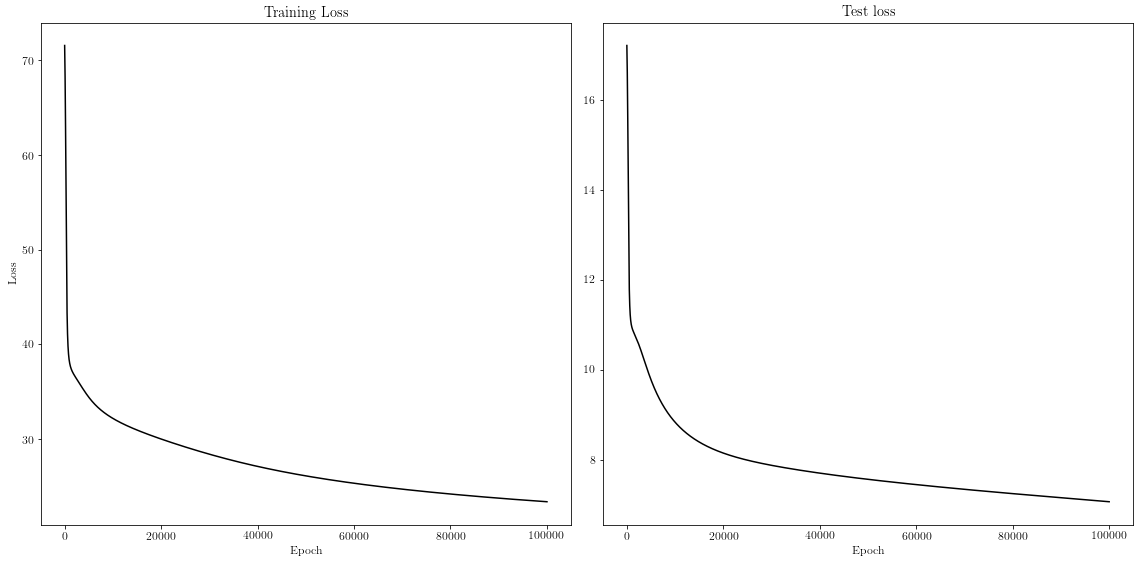

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))


title = "Test loss"
ax[0].plot(train_losses, c='k')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title('Training Loss')
ax[0].xaxis.set_major_locator(MaxNLocator(6))
ax[0].yaxis.set_major_locator(MaxNLocator(6))

ax[1].plot(test_losses, c='k')
ax[1].set_xlabel("Epoch")
ax[1].set_title('Test loss')
ax[1].xaxis.set_major_locator(MaxNLocator(6))
ax[1].yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

In [11]:
#my attempt to generate smoth mapo of classification

x1_grid = np.linspace(-6, -4, num=100)  # Range of x values
x2_grid = np.linspace(-900, 1035, num=100)  # Range of y values

x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)        
grid = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))

#normailise the grid
grid_mean, grid_std = (np.mean(grid, axis=0), np.std(grid, axis=0))
grid_n = (grid - grid_mean) / grid_std

N , D_in = grid_n.shape
    
_, y_pred = forward_pass(grid_n, w, N)


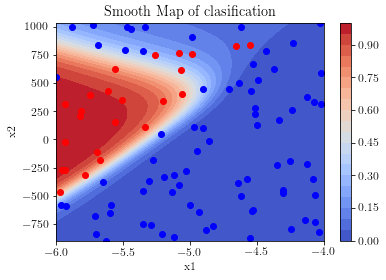

In [12]:
y_pred_mesh = y_pred.reshape(x1_mesh.shape)

# Create a contour plot of y_pred_mesh
plt.contourf(x1_mesh, x2_mesh, y_pred_mesh, levels=20, cmap='coolwarm')
plt.colorbar()
for i in range(len(x_1)):
    if c[i] == 0: 
        plt.scatter(x_1[i], x_2[i], c = 'blue')
    elif c[i] == 1:
        plt.scatter(x_1[i], x_2[i], c = 'red')
    else:
        print('WARNING')
# Set plot labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Smooth Map of clasification')

# Show the plot
plt.show()


I am Happy with this! 

# Question 3

In [13]:
import torch

In [14]:
H = 7


N, D_in = x_train.shape
N, D_out = y_train.shape

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Construct the model.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

epochs = 100000
learning_rate = 1e-4

train_losses = np.empty(epochs)
test_losses = np.empty(epochs)

for t in range(epochs):
    # Forward pass.
    y_pred = model(x_train)
    y_pred_test = model(x_test)

    # Compute loss.
    train_loss = loss_fn(y_pred, y_train)    
    test_loss = loss_fn(y_pred_test, y_test)
 
    if not t % 1000:
        print(t, test_loss.item())

    train_losses[t] = train_loss.item()
    test_losses[t] = test_loss.item()


    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass.
    train_loss.backward()

    # Update the weights using gradient descent.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 22.053691864013672
1000 15.303940773010254
2000 14.509320259094238
3000 14.034939765930176
4000 13.424696922302246
5000 12.6901216506958
6000 11.890619277954102
7000 11.099370956420898
8000 10.383851051330566
9000 9.793556213378906
10000 9.352087020874023
11000 9.055718421936035
12000 8.877922058105469
13000 8.781442642211914
14000 8.73208999633789
15000 8.70451831817627
16000 8.680880546569824
17000 8.648163795471191
18000 8.596501350402832
19000 8.516932487487793
20000 8.397037506103516
21000 8.220041275024414
22000 7.977470874786377
23000 7.687971115112305
24000 7.394580841064453
25000 7.137972831726074
26000 6.9377312660217285
27000 6.794092655181885
28000 6.697235584259033
29000 6.635143280029297
30000 6.59731388092041
31000 6.576091289520264
32000 6.5661749839782715
33000 6.5646514892578125
34000 6.568744659423828
35000 6.577489852905273
36000 6.589776515960693
37000 6.604959964752197
38000 6.622476100921631
39000 6.641329288482666
40000 6.661932468414307
41000 6.68391227722168

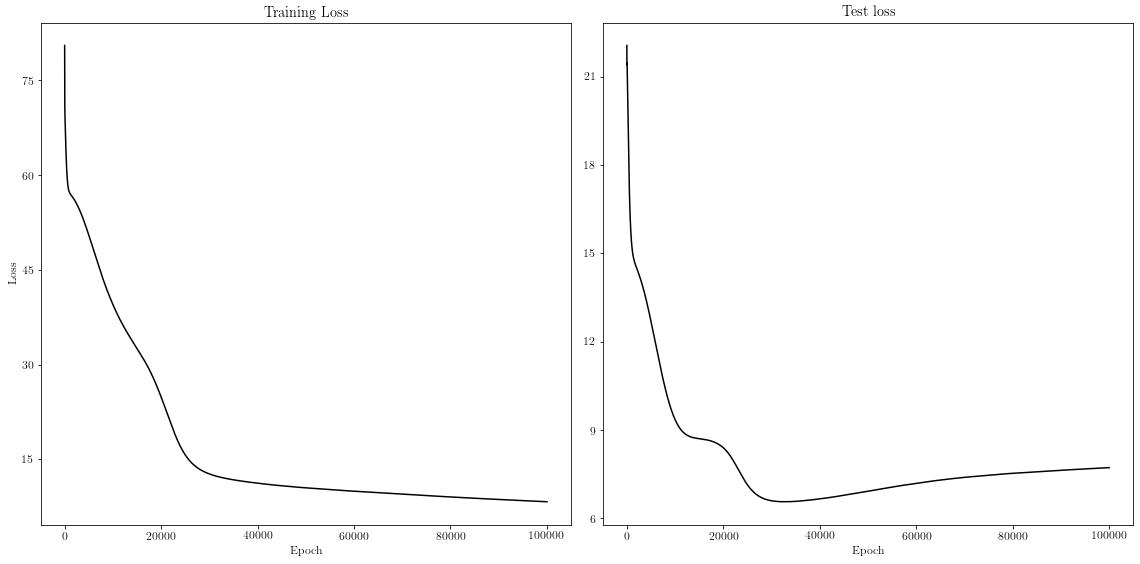

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))


losses = test_losses
title = "Test loss"
ax[0].plot(train_losses, c='k')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title('Training Loss')
ax[0].xaxis.set_major_locator(MaxNLocator(6))
ax[0].yaxis.set_major_locator(MaxNLocator(6))

ax[1].plot(test_losses, c='k')
ax[1].set_xlabel("Epoch")
ax[1].set_title('Test loss')
ax[1].xaxis.set_major_locator(MaxNLocator(6))
ax[1].yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

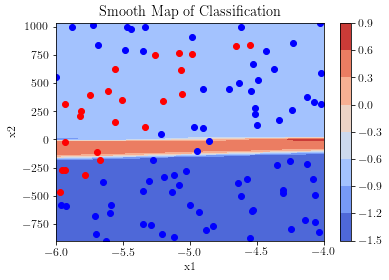

In [16]:
#set up the grid
x1_grid = np.linspace(-6, -4, num=100)  # Range of x values
x2_grid = np.linspace(-900, 1035, num=100)  # Range of y values

x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)        
grid = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))

grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Pass the grid through the model
predictions = model(grid_tensor)
#reshape the predictions
predictions = predictions.detach().numpy().reshape(x1_mesh.shape)

plt.contourf(x1_grid, x2_grid, predictions, cmap='coolwarm')
plt.colorbar()
for i in range(len(x_1)):
    if c[i] == 0: 
        plt.scatter(x_1[i], x_2[i], c = 'blue')
    elif c[i] == 1:
        plt.scatter(x_1[i], x_2[i], c = 'red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Smooth Map of Classification')
plt.show()

Simmilar to question 3 I used the same segmented data and I belive the model initialises the weights independantly. In regards to the number of epochs and learning rates I cannot justify my choice because I failed to reproduce a trained network, although I dont belive that they are the cause of my failiure since I varies the hyperparameters widely and got more or less the same inconsitentcy. I also attempted to change the number of neurons in the hidden layer and the choice of activation function to no avail. Im not sure what the issue is :( . 


The loss plot in question 2 always decrease with epochs which is good, howerver the test loss plot in question 3 does not always decrease and begins increasing reducing my confidence that the model has converged on the right solution. This could be due to local minimums slowing down the models learning. Perhaps that the model in Q3 converged on a local minimum but I doubt that. The Smooth maps obviously differ significantly, whereas the one in question 2 seems to be quite accurate with only a few point being incorectly classified. This is sadly not the case for the plot above. Since I am useing the same neural network in both question with the same hyper parameters I would expect the smooth plots to be very simmilar and the variatioin be due to how the weights were initialised (this would cause the loss plots to look different at the start but I belive converge in a simmilar way).  

# Question 4 

Activation function:\
A neuron in a neural network will takes the weighted sum of of the previous layer as its input.
The output of that neuron will depend on the activation function, and this needs to be carefully considered. 
If the network is to learn any non-linear relationships in the data (as it should), then the activation function will need to be non-linear.

Back propagation:\
When initialising the neural network we dont actually know the weights of the neurons. Therefore back propagation was an algorithm designed to update these weights with numerous itterations. It achieves this by comparing the predicted outputs to the desired outputs from the training set, propagating the error to the previous layer and the difference is used to update the weights with some learning rate. The essence is that weights that cotribute to making good predictions will not be changed very much whereas weights that contribute to bad predictions will be effected the most. It must be noted that this algorithm relies on derivatives of the loss function w.r.t the weights in order to update them and thus is vunerable to explosive/vanishing gradients that can kill neurons.

Learning rate:\
Once we calculated the derivatives of the loss function w.r.t a weight, it is not clear how much we should be updating these weights. Therefore the learning rate is introduced as a hyper parameter that will update the weights as quickly/slowly as we like. Choosing a lower learning rate will result in longer training and if it was too large you might be overstepping your optimisation and end up with noisier convergence. 

Vanishing gradients:

Are a consequence of a specific activation function in conjunction with badly initialised weights or poorly normalised data. Consider an example where the activation funciton is the sigmoid function and its derivative:

$$
\beta = f(\alpha) = \frac{1}{1 + e^{-\alpha}}
$$
$$
\frac{\partial\beta}{\partial\alpha} = \beta(1-\beta) \quad .
$$

If the input ($\alpha$) was large due to initialisation than the output ($\beta$) would be close to 1 and therefore the derivative will be close to 0. Since this is be multiplied by all of the other gradients in the chain rule then overall the gradient is pretty much 0 and there will be no update to the weights. This has the effect of killing a portion of the network reducing the its ability to 'learn'. 

Weights and Biases:\
Each output is sent to every neuron in the following layer. What makes these outputs significant to the neurons is the weights accosiated with them. Since a neuron will take the weighted sum of each output from the previous layer as its input to the activation function, the weights can therefore be considered as a measure of how 'important' that output is to that pathway.
Biases are introduced in each layer of the network to allow a shift/offset in the activation function (think about the linear input to the activation function, $\vec{w}\vec{x} + b$, where b is the weight of the bias). By introducing a bias we can train the network to look for intercepts and offsets in the data set resulting in more complex patters being accounted for. 

Loss:\
Loss in machine learning is measure via the mean squared error function:
$$
E = \frac{1}{2}\sum_{i}^{N}(y_i - y_{\textrm{pred},i})^2
$$
During each iteration while training we measure the loss (how much did our predicted values differ from the actual values) and use that information to correct the weights via backward propagation. The goal is to optimise the values of the weights such that we minimise the loss.

Convolution kernals:\
Convolution kernals/filters are heavily used to distinguish features within images. In a typical neural network there is no way for it to distinguish patters in a group of pixels. Therefore Convolution Neural Networks (CNN) employ convolution kernals/matrix (that are typically 3x3 in size) to scan over the images and output a value that convolves the information around a certain pixcel. This new output will intrinsically store information about that region for which the CNN can then distiguish patterns from and gives rise patter recognition in machine learning.

Pooling:\
Pooling is an operation that reduces the spacial size of the representation data. A typical pooling would take the maximum value of of neighbouring inputs as that would capture the most dominant features in that region. This helps to simplifiy and condense the importnat features in the images leading to an over all increase in the effecientcy and robustness of the neural network. 

Data Augmentation:\
Preforming data augmentation, essentially allows for a significant increase in the training data set, leading to a more robust network. 
By preforming multiple operations on the training set, such as inverting the images along a dimension, inverting the colour scheme or even adding noise to the data we can train the network to focus more on the distinguishing features. 

Softmax layer:\
Finally, the softmax layer is responsible for classification with a neural network. To achieve this the softmax function is introduced in the output layer with the following form: 
$$
\sigma\left(\vec{z}\right)_i = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}
$$
Where $z$ is the set of $K$ inputs into the softmax function $\sigma(z)_i$. 
The significance of using this function is such that the output predictions are now scaled between 0 and 1 where the largest $\sigma(z)_i$ value corresponds to the most probable output. Its important to note that a product of a Softmax function does not equate to the actual probabilities.




